<a href="https://colab.research.google.com/github/KodumuruRaja/Feature-Engineering/blob/main/Feature-Engineering-(All%20Techniques%20to%20handle%20Missing-Values).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Different types of Missing Data**

# **1) Missing Completely at Random (MCAR)**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/titanic1.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#This Embarked data is missing completely at random
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# **2) Missing Data not at Random (MNAR)**
# It is also called as **Systematic missing values**

In [ ]:
#Null values of Cabin are replaced with 1 and Non-Null with 0
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)
# find the percentage of Null values
df['Cabin_null'].mean()

0.7710437710437711

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [ ]:
df['Cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int64

In [ ]:
# Percentage of data missing for  survived(1), and not-Survived(0)
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

# **3) Missing at Random (MAR)**

# **All the Techniques to handle Missing Data** 

# **1) Mean/Median/Mode Imputation**
# When should we apply this?
# It is applied when data are Missing Completely at Random (MCAR)
# We solve this by replacing NAN with frequent occurance of the variables

In [ ]:
df=pd.read_csv("/content/titanic1.csv",usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
# Now see the Percentage of Missing Values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
def impute(df,variable,median):
  df[variable+ "_median"] =df[variable].fillna(median)

In [ ]:
median=df.Age.median()

In [ ]:
median

28.0

In [ ]:
impute(df,'Age',median)

In [ ]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
# Checking Standard Deviation for Distribution of Data
df['Age'].std(),df['Age_median'].std()

(14.526497332334044, 13.019696550973194)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

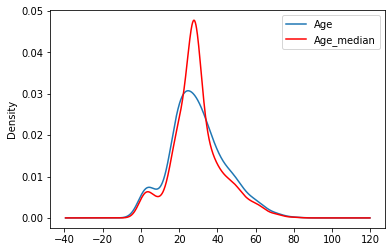

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# **2) Random Sample Imputation**
# It consists of taking random observation from the dataset and we use this observation to replace the nan values
# **When should it be used?**
# It assumes that the data are missing completely at random (MCAR)

In [ ]:
df=pd.read_csv("/content/titanic1.csv",usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df['Age'].isnull().sum()

177

In [ ]:
#Filling nan values with some count
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
# All the nan value indexes
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [ ]:
def impute(df,variable,median):
  df[variable+ "_median"] =df[variable].fillna(median)
  df[variable+ "_random"] =df[variable]
  # It wil fill the random Sample with nan
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  # pandas need to have same index to merge into dataset
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [ ]:
median=df.Age.median()

In [ ]:
median

28.0

In [ ]:
impute(df,'Age',median)

In [ ]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

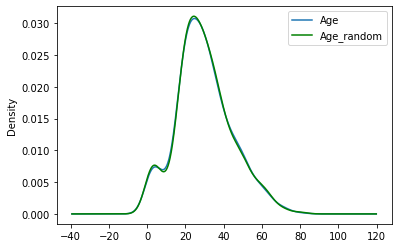

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

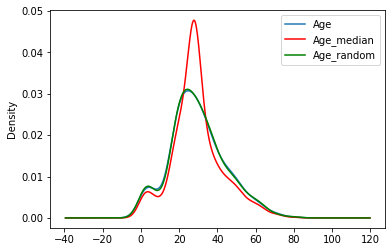

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# **3) Capturing nan values with a new feature**
# It works well if the data is not missing at Random

In [ ]:
df=pd.read_csv("/content/titanic1.csv",usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df['Age']=np.where(df['Age'].isnull(),1,0)

In [ ]:
df.head()

,Survived,Age,Fare
0,0,0,7.2500
1,1,0,71.2833
2,1,0,7.9250
3,1,0,53.1000
4,0,0,8.0500


In [ ]:
df.Age.median()

0.0

In [ ]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [ ]:
df.head(10)

,Survived,Age,Fare
0,0,0,7.2500
1,1,0,71.2833
2,1,0,7.9250
3,1,0,53.1000
4,0,0,8.0500
5,0,1,8.4583
6,0,0,51.8625
7,0,0,21.0750
8,1,0,11.1333
9,1,0,30.0708


# **4) End of Distribution Imputation**
# It is to fill nan values at the far end (after 3rd Standard Deviation in Normal Distribution)

In [ ]:
df=pd.read_csv("/content/titanic1.csv",usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


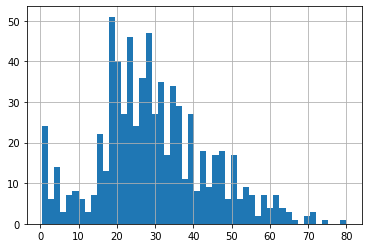

In [ ]:
df.Age.hist(bins=50)

In [ ]:
df.Age.mean()

29.69911764705882

In [ ]:
# Percentage of data at the end of distribution
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


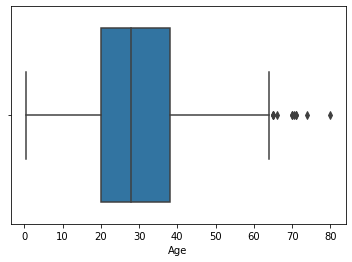

In [ ]:
sns.boxplot('Age',data=df)

In [ ]:
def impute(df,variable,median,extreme):
  df[variable+"_end_distribution"]=df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [ ]:
impute(df,'Age',df.Age.median(),extreme)

In [ ]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


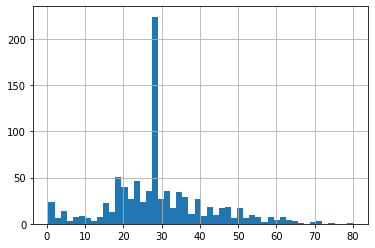

In [ ]:
df['Age'].hist(bins=50)

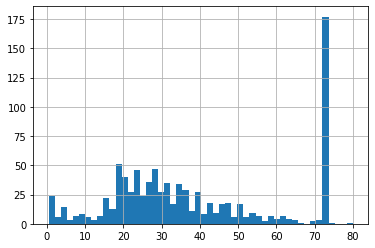

In [ ]:
df['Age_end_distribution'].hist(bins=50)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


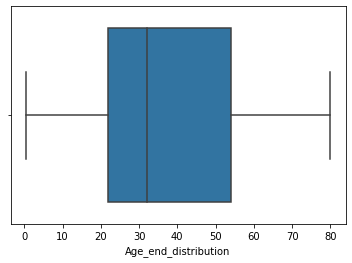

In [ ]:
sns.boxplot('Age_end_distribution',data=df)

# **5) Arbitary value Imputation**
# It consists of replacing NAN by an arbitary value

In [ ]:
df=pd.read_csv("/content/titanic1.csv",usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
# Arbitary values
# It should not be more frequently present
def impute_nan(df,variable):
  df[variable+'_hundred']=df[variable].fillna(100)

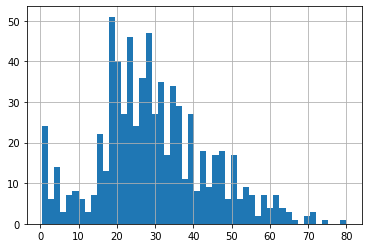

In [ ]:
df['Age'].hist(bins=50)

# **6) Frequent Categories Imputation**
# It handles Categorical Missing values

In [ ]:
df=pd.read_csv("/content/housetrain.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [ ]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

# Compute the Frequency with every feature

In [ ]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

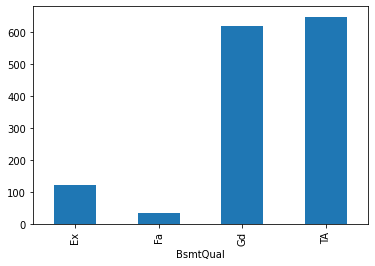

In [ ]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

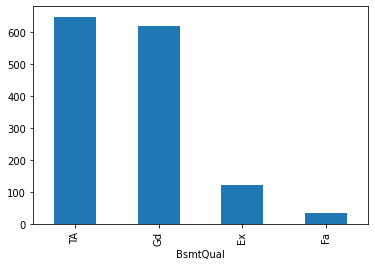

In [ ]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

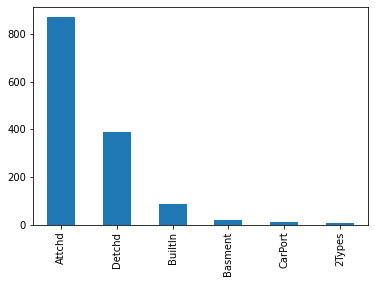

In [ ]:
df['GarageType'].value_counts().plot.bar()

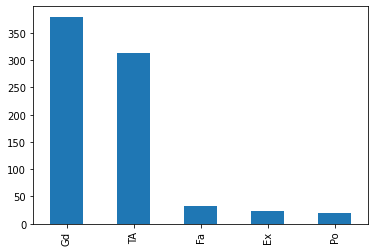

In [ ]:
df['FireplaceQu'].value_counts().plot.bar()

In [ ]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [ ]:
df['GarageType'].mode()

0    Attchd
dtype: object

In [ ]:
# Replacing function
def impute1(df,variable):
  mfc=df[variable].value_counts().index[0]
  df[variable].fillna(mfc,inplace=True)

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
  impute1(df,feature)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

# **7) Adding a variable to capture NAN**

In [ ]:
df=pd.read_csv("/content/housetrain.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
frequent=df['BsmtQual'].mode()[0]

In [ ]:
df['BsmtQual'].mode()

0    TA
dtype: object

In [ ]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [ ]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [ ]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [ ]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
5,Gd,Gd,Attchd,143000,0,1
6,Ex,Gd,Attchd,307000,0,0
7,Gd,TA,Attchd,200000,0,0
8,TA,TA,Detchd,129900,0,0
9,TA,TA,Attchd,118000,0,0


# **Suppose if you have more frequent categories, we just replace NAN with a new category**

In [ ]:
df=pd.read_csv("/content/housetrain.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
def impute1(df,variable):
  df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
  impute1(df,feature)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [ ]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [ ]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
